In [19]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

from feature_engineering import transformation
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Leer dataset

In [4]:
use_cols = [
    'age', 'job', 'marital', 'education', 'duration',
    'y'
]

data = pd.read_csv('./data/bank-additional-full.csv', sep=';', usecols= use_cols)

In [5]:
data.head(3)

,age,job,marital,education,duration,y
0,56,housemaid,married,basic.4y,261,0
1,57,services,married,high.school,149,0
2,37,services,married,high.school,226,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, data.duration, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((28831, 6), (12357, 6))

In [7]:
# Transformación logarítmica

In [8]:
import pandas as pd

dataframe_a = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})

# Asignación directa (NO es una copia)
dataframe_b = dataframe_a

# Eliminamos una columna en dataframe_b
dataframe_b.drop(columns=['col2'], inplace=True)

print("dataframe_a:")
print(dataframe_a)

dataframe_a:
   col1
0     1
1     2
2     3


Variable duration Q-Q plot


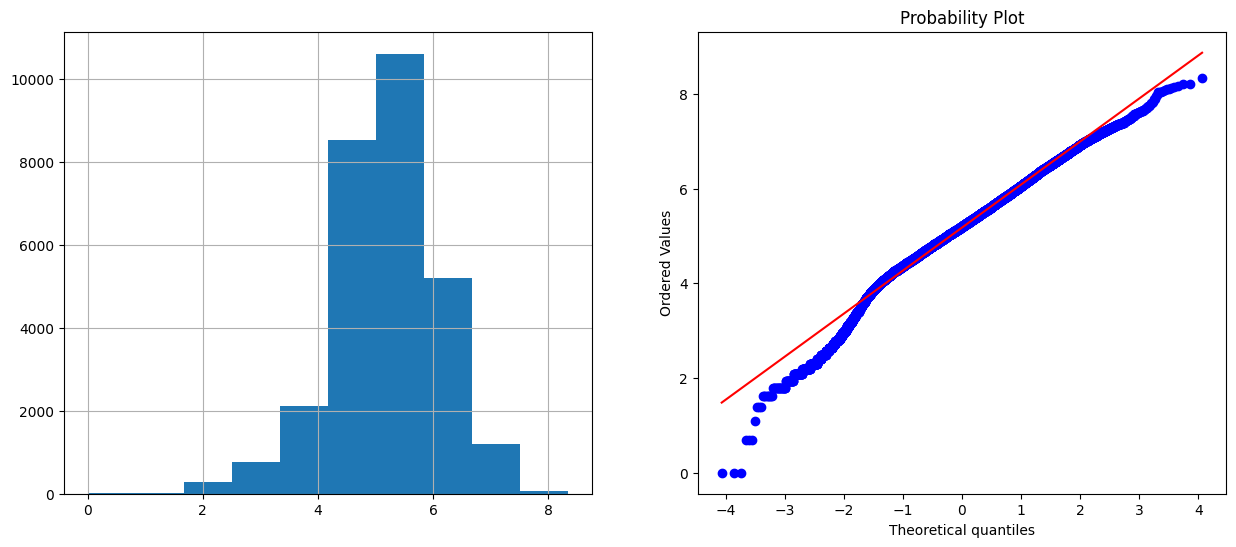

       age           job   marital          education  duration  y  \
31880   37    management   married  university.degree       195  0   
38177   54    management  divorced  university.degree       214  0   
2459    49   blue-collar   married           basic.9y       813  0   
756     30      services   married  university.degree        51  0   
11275   23   blue-collar    single           basic.9y       359  0   
29677   49  entrepreneur   married  university.degree       334  0   

       duration_log  
31880      5.278115  
38177      5.370638  
2459       6.701960  
756        3.951244  
11275      5.886104  
29677      5.814131  


In [9]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.log_transform(data=X_train,cols=['duration'])
print(X_train_copy.head(6))

In [10]:
# Transformación recíproca

Variable duration Q-Q plot


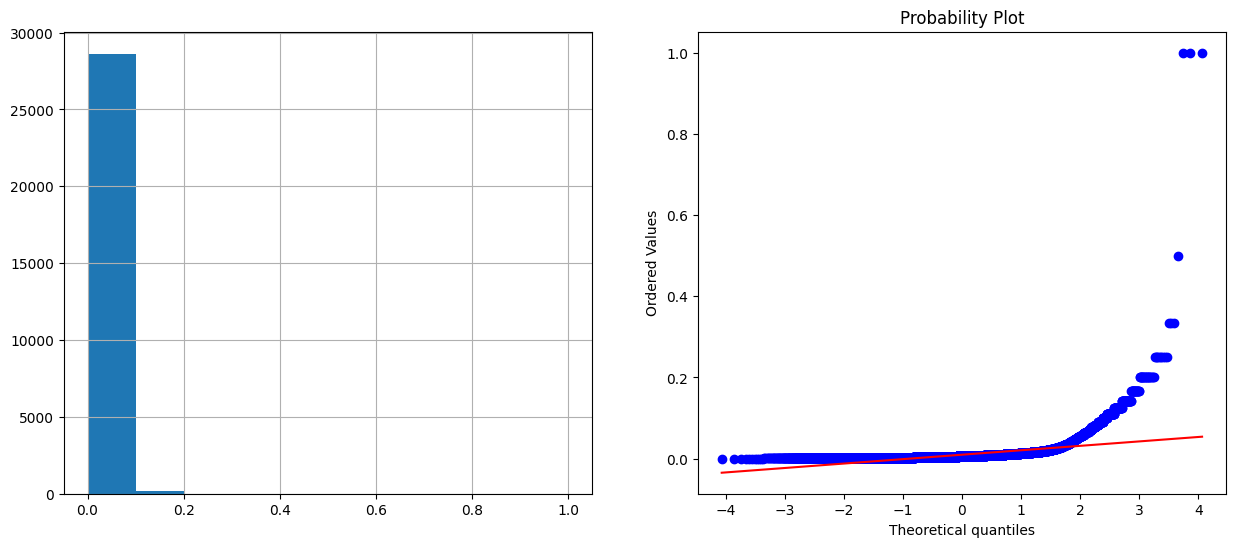

       age           job   marital          education  duration  y  \
31880   37    management   married  university.degree       195  0   
38177   54    management  divorced  university.degree       214  0   
2459    49   blue-collar   married           basic.9y       813  0   
756     30      services   married  university.degree        51  0   
11275   23   blue-collar    single           basic.9y       359  0   
29677   49  entrepreneur   married  university.degree       334  0   

       duration_reciprocal  
31880             0.005128  
38177             0.004673  
2459              0.001230  
756               0.019608  
11275             0.002786  
29677             0.002994  


In [11]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = X_train_copy[X_train_copy.duration!=0]
X_train_copy = transformation.reciprocal_transform(data=X_train_copy,cols=['duration'])
print(X_train_copy.head(6))

In [12]:
# Transformación Raíz Cuadrada en Machine Learning

Variable duration Q-Q plot


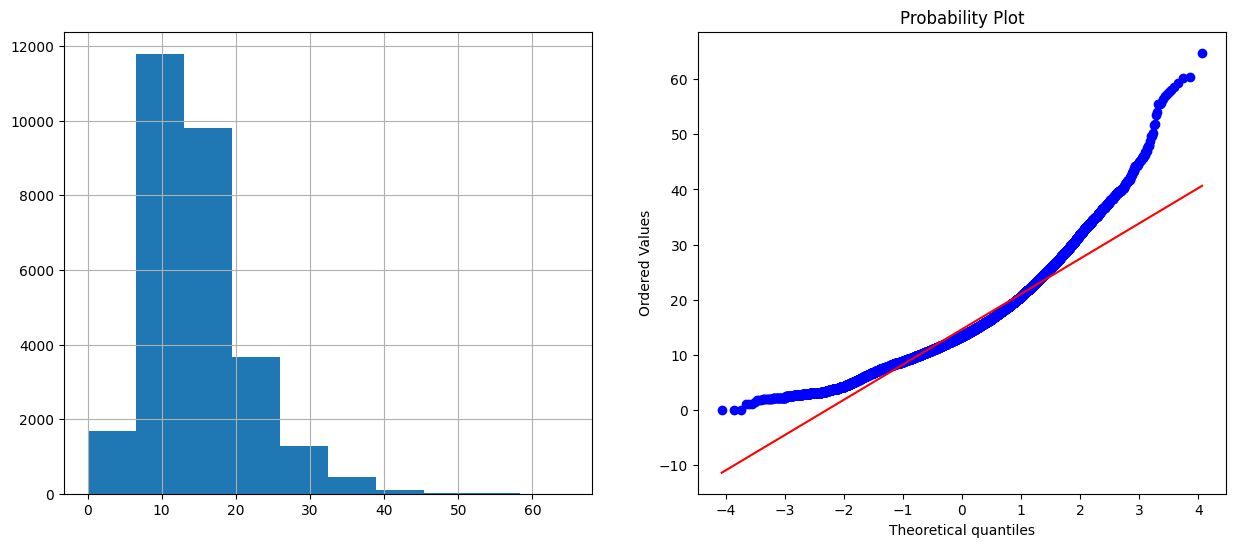

       age           job   marital          education  duration  y  \
31880   37    management   married  university.degree       195  0   
38177   54    management  divorced  university.degree       214  0   
2459    49   blue-collar   married           basic.9y       813  0   
756     30      services   married  university.degree        51  0   
11275   23   blue-collar    single           basic.9y       359  0   
29677   49  entrepreneur   married  university.degree       334  0   

       duration_square_root  
31880             13.964240  
38177             14.628739  
2459              28.513155  
756                7.141428  
11275             18.947295  
29677             18.275667  


In [13]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.square_root_transform(data=X_train,cols=['duration'])
print(X_train_copy.head(6))

In [14]:
# Transformación Exponencial en Machine Learning

Variable duration Q-Q plot


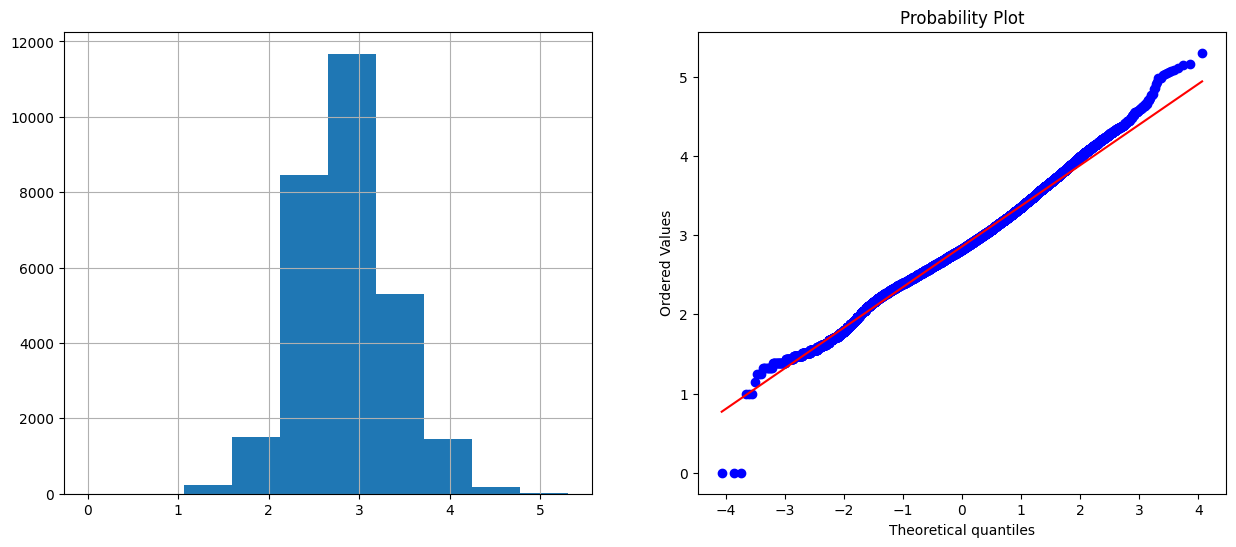

       age           job   marital          education  duration  y  \
31880   37    management   married  university.degree       195  0   
38177   54    management  divorced  university.degree       214  0   
2459    49   blue-collar   married           basic.9y       813  0   
756     30      services   married  university.degree        51  0   
11275   23   blue-collar    single           basic.9y       359  0   
29677   49  entrepreneur   married  university.degree       334  0   

       duration_exp  
31880      2.870826  
38177      2.924710  
2459       3.819602  
756        2.195402  
11275      3.243537  
29677      3.197049  


In [15]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.exp_transform(data=X_train,cols=['duration'],coef=0.2)
print(X_train_copy.head(6))

In [ ]:
# Transformación de Box-Cox

In [16]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer().fit(X_train[['duration']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['duration_boxcox'] = pt.transform(X_train_copy[['duration']])
print(X_train_copy.head(6))

       age           job   marital          education  duration  y  \
31880   37    management   married  university.degree       195  0   
38177   54    management  divorced  university.degree       214  0   
2459    49   blue-collar   married           basic.9y       813  0   
756     30      services   married  university.degree        51  0   
11275   23   blue-collar    single           basic.9y       359  0   
29677   49  entrepreneur   married  university.degree       334  0   

       duration_boxcox  
31880         0.058741  
38177         0.163058  
2459          1.806006  
756          -1.311536  
11275         0.766889  
29677         0.680216  


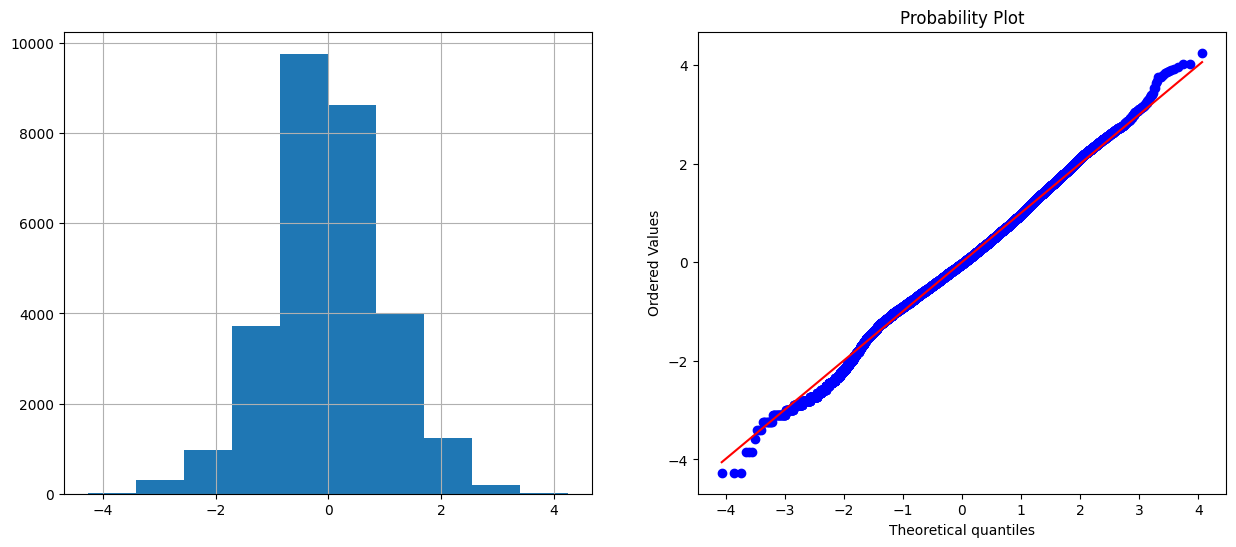

In [17]:
transformation.diagnostic_plots(X_train_copy,'duration_boxcox')

In [18]:
# Transformación Cuantílica con QuantileTransformer

In [20]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal').fit(X_train[['duration']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['duration_qt'] = qt.transform(X_train_copy[['duration']])
print(X_train_copy.head(6))

       age           job   marital          education  duration  y  \
31880   37    management   married  university.degree       195  0   
38177   54    management  divorced  university.degree       214  0   
2459    49   blue-collar   married           basic.9y       813  0   
756     30      services   married  university.degree        51  0   
11275   23   blue-collar    single           basic.9y       359  0   
29677   49  entrepreneur   married  university.degree       334  0   

       duration_qt  
31880     0.099274  
38177     0.216204  
2459      1.761948  
756      -1.439001  
11275     0.826698  
29677     0.741388  


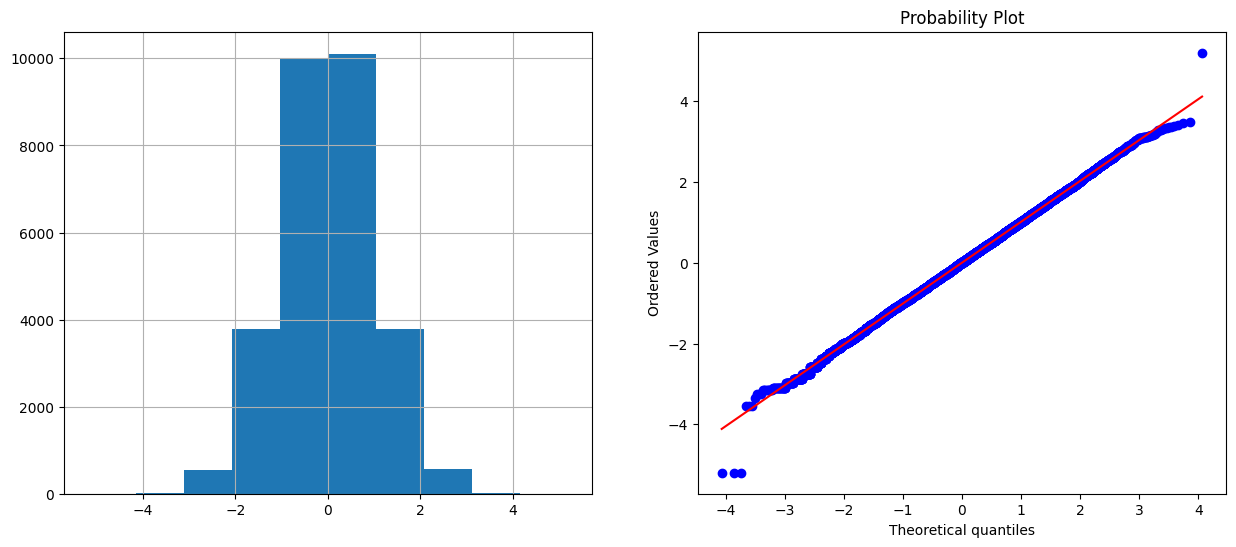

In [21]:
transformation.diagnostic_plots(X_train_copy,'duration_qt')